In [1]:
from google.colab import files
uploaded = files.upload()

Saving BTC-USD.csv to BTC-USD.csv


In [10]:
import pandas as pd
from prophet import Prophet

In [ ]:
!pip

In [11]:
df = pd.read_csv('BTC-USD.csv')
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]
print(df)

             ds             y
0    2022-08-01  23314.199219
1    2022-08-02  22978.117188
2    2022-08-03  22846.507813
3    2022-08-04  22630.957031
4    2022-08-05  23289.314453
..          ...           ...
361  2023-07-28  29319.246094
362  2023-07-29  29356.917969
363  2023-07-30  29275.308594
364  2023-07-31  29230.111328
365  2023-08-01  28922.037109

[366 rows x 2 columns]


In [12]:
prophet = Prophet()
prophet.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4rjpvvst/zlxpgilt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4rjpvvst/b8r8d5v1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26048', 'data', 'file=/tmp/tmp4rjpvvst/zlxpgilt.json', 'init=/tmp/tmp4rjpvvst/b8r8d5v1.json', 'output', 'file=/tmp/tmp4rjpvvst/prophet_model9fggj3it/prophet_model-20230801170354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:03:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:03:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [13]:
future = prophet.make_future_dataframe(periods=365)
print(future)

            ds
0   2022-08-01
1   2022-08-02
2   2022-08-03
3   2022-08-04
4   2022-08-05
..         ...
726 2024-07-27
727 2024-07-28
728 2024-07-29
729 2024-07-30
730 2024-07-31

[731 rows x 1 columns]


In [14]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
531,2024-01-14,32708.734197,27094.750906,37890.660729
532,2024-01-15,32695.697077,27046.350390,38130.210310
533,2024-01-16,32747.725969,26924.591616,38042.293278
534,2024-01-17,32722.831582,26860.915660,38257.662326
535,2024-01-18,32729.543089,27045.440466,38114.936609
...,...,...,...,...
726,2024-07-27,36263.430348,19123.650496,52424.557204
727,2024-07-28,36312.381840,19523.160330,52752.920900
728,2024-07-29,36299.344719,19046.057529,52333.666901
729,2024-07-30,36351.373612,18883.660257,52967.756400


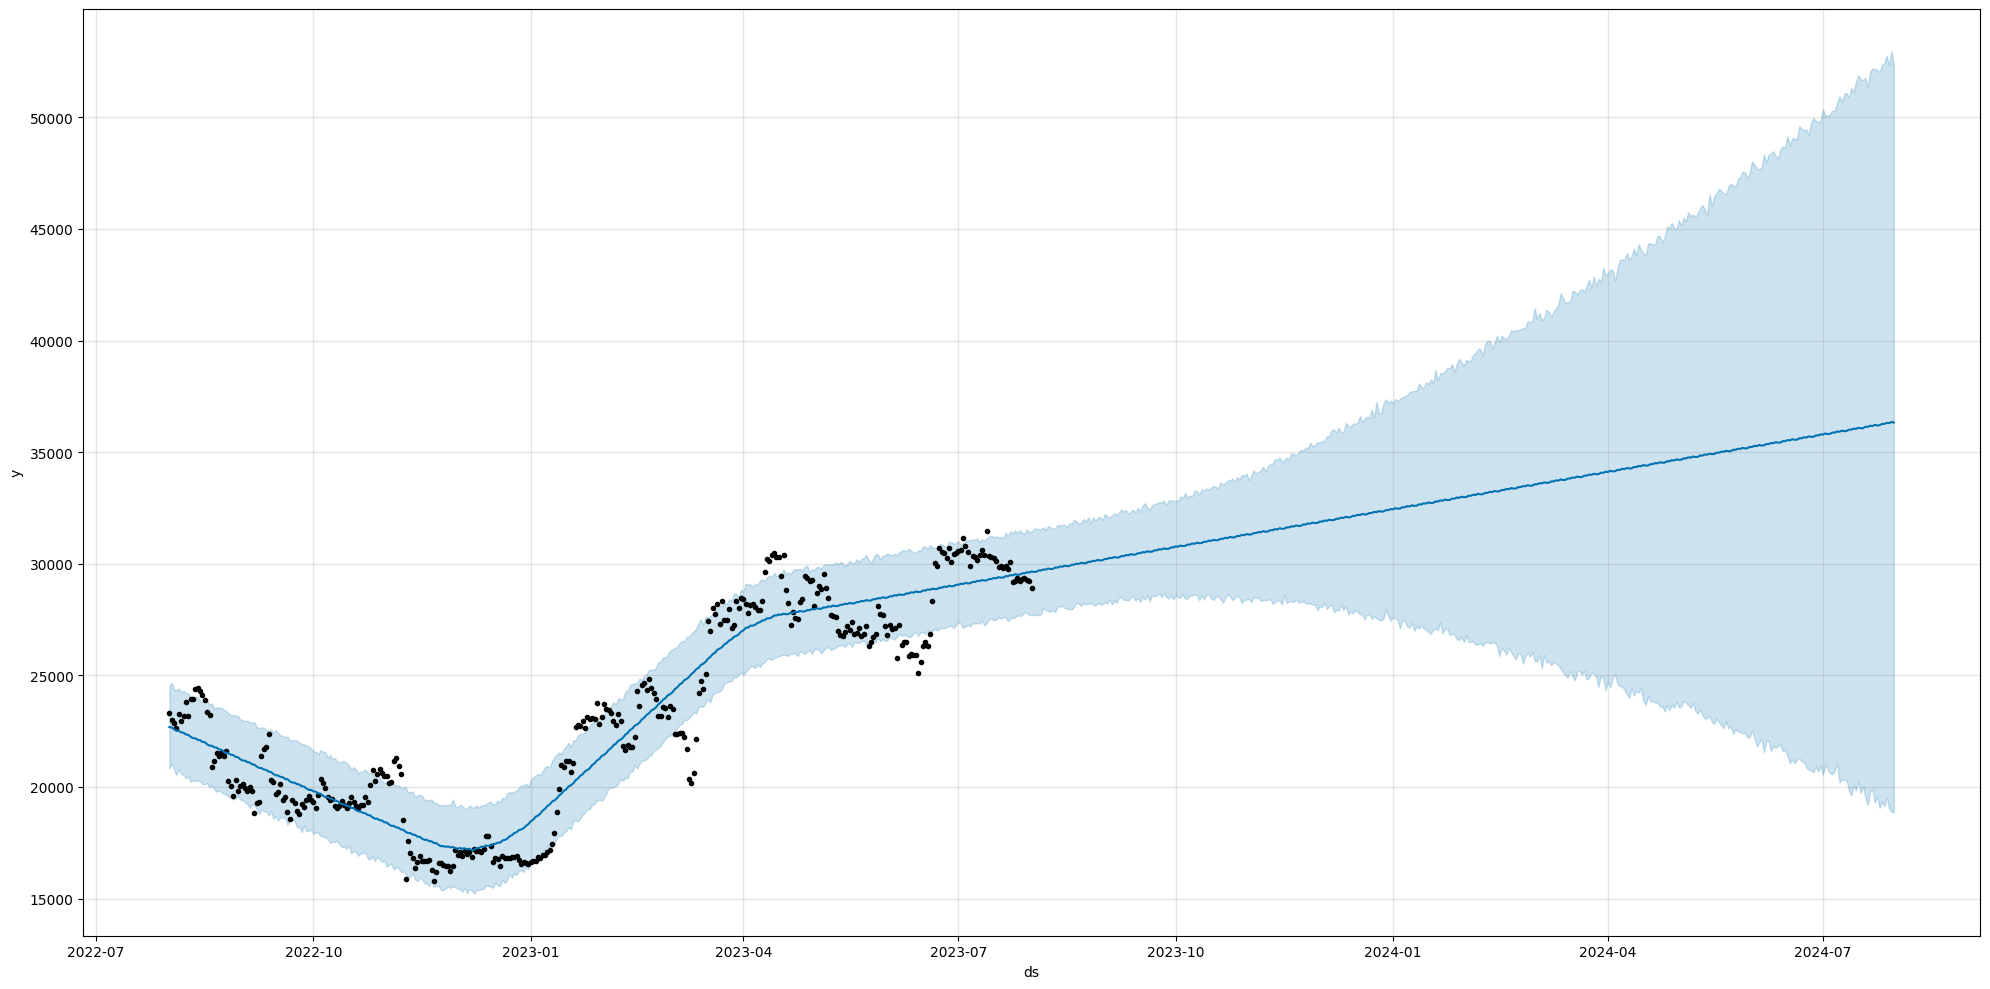

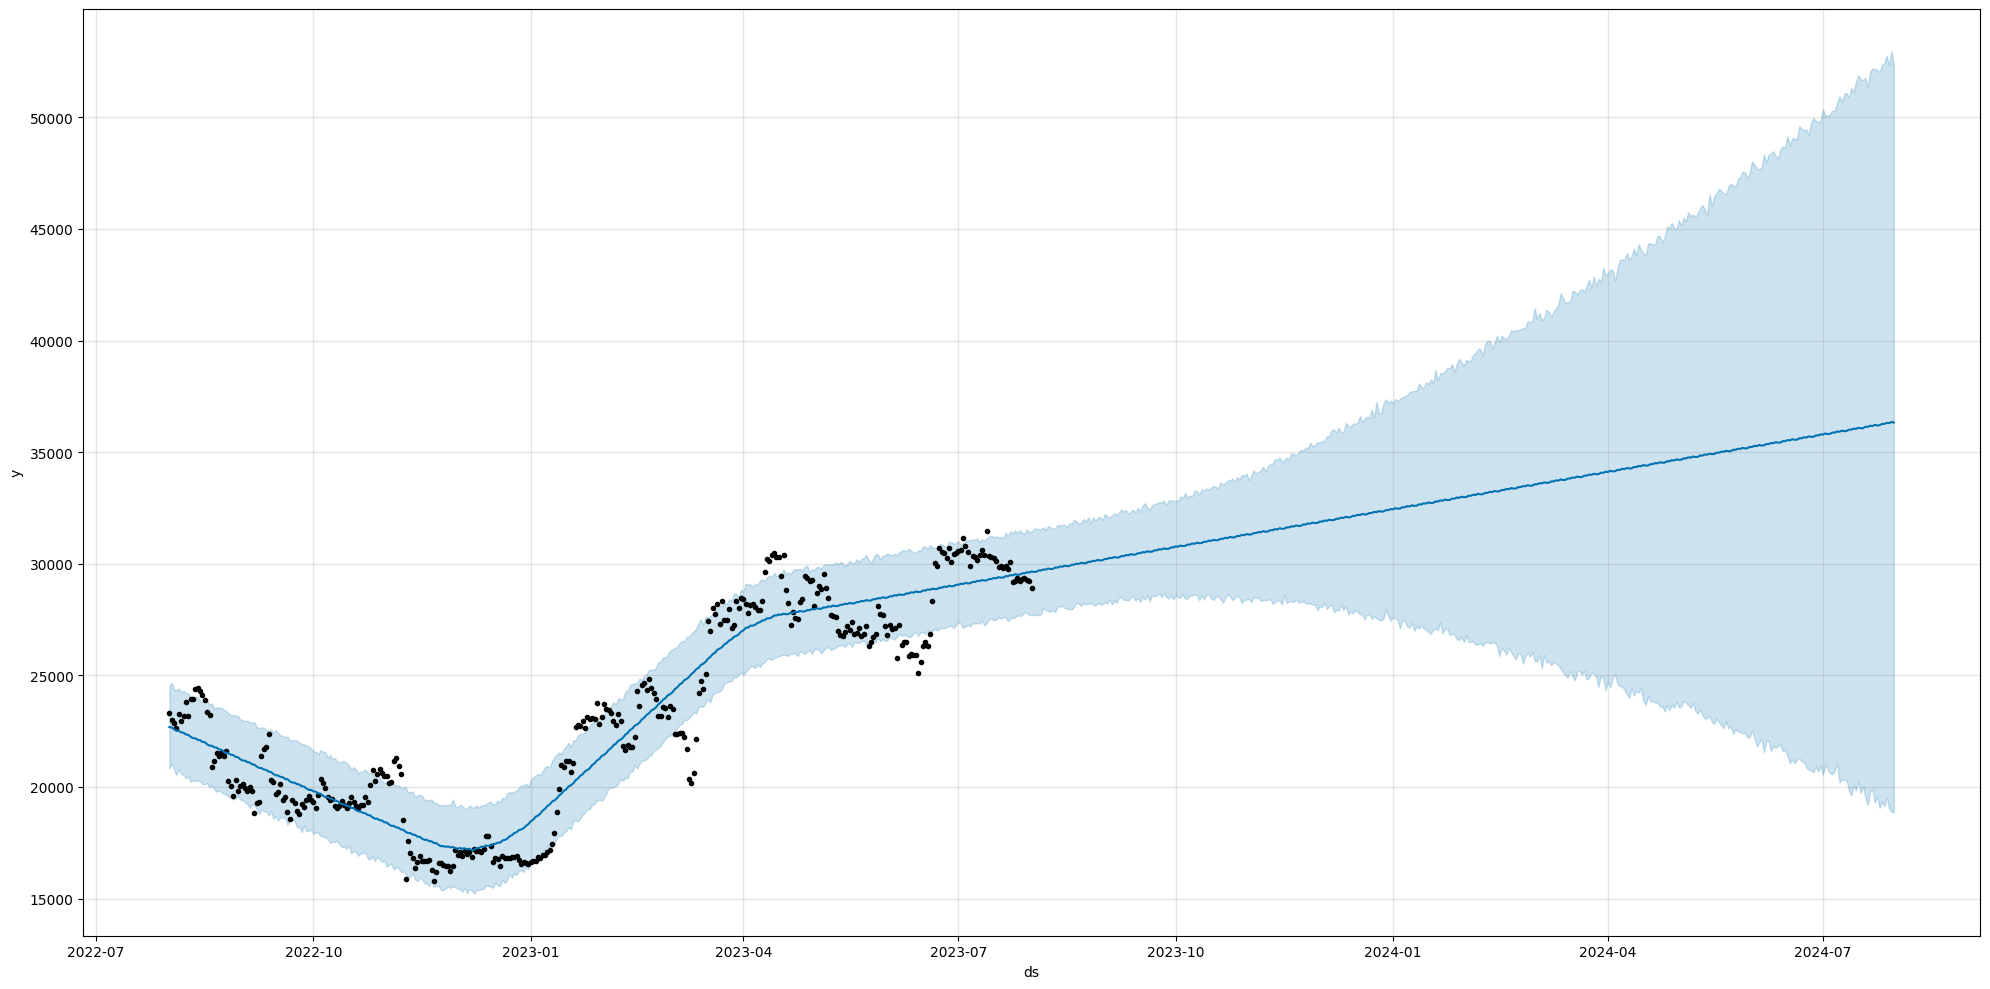

In [16]:
from prophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))